# 라이브러리 불러오기

In [1]:
# mecab 설치
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [76.0 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:11 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Packages [872 kB]
Get:13 http

bash: line 6: fg: no job control
bash: line 8: fg: no job control
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 5.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0   515k      0  0:00:02  0:00:02 --:--:--  809k
./configure: line 7378: /usr/bin/file: No such file or directory
In file included from viterbi.cpp:14:0:
param.h:30:13: warning: 'Target {anonymous}::lexical_cast(Source

In [2]:
import numpy as np
import pandas as pd

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
data = pd.read_csv("/content/drive/MyDrive/데캡디/review_link10.csv")

In [ ]:
#df_product_name = data['상품명'].unique()
#data = data[data['상품명'] == df_product_name[0]]

# 데이터 전처리

In [6]:
# 해당 문장 제거
string =  '※ 해당 리뷰는 원칙적으로 기본 상품이 동일한 단품 사용 후 작성된 것이며,개별 상품에 따라 용량 내지 일부 구성(1+1, 기획상품 등)이 상이할 수 있음을 안내드립니다.'

review_clean = []
for i in range(len(data)):
    temp = data['리뷰'].iloc[i]
    review_clean.append(temp.replace(string, ""))

In [7]:
data['리뷰'] = review_clean

In [8]:
data['리뷰'] = data['리뷰'].str.replace('\n',' ')
data['리뷰'] = data['리뷰'].str.replace('  ',' ')

In [9]:
target_string = ['피부타입', '복합성에 좋아요', '피부고민', '진정에 좋아요', '자극도', '자극없이 순해요']
data = data[~data['리뷰'].map(lambda x: all(string in x for string in target_string))]

In [10]:
data.iloc[4]['리뷰']

'원쁠원 행사 넘 좋아요 이번달 끝나기 전에 하나 더 사놓을까 고민이 되네요 .. ❄💙 여름용 수분크림 찾는 건성 김미연 다 이거 함 써봐 .. 넘 무겁지도 가볍지도 않은 시원한 사용감의 크림입니다!!! 젤크림이라 펴바르기도 좋아요!! 조금 놔두면 흡수 금방 되고 마무리도 산뜻하게 느껴져요. 가벼운 사용감에 비해 보습력은 짱짱헙니다! 젤크림이라 시원하기만 하고 보습은 전혀 안 된다? 무슨 말씀을 하시는 거죠?? 이 아이는 다릅니다!!! 속보습을 완전 잘 챙겨주는 느낌!!! 특히 여름에 하나쯤 갖고 있으면 정말 좋습니다!! 간절기에는 건성피부들에게 조금 미흡하겠지만 날 더운 여름날 피지로 고생하시는 분들 .. 흑흑 그분들에게 아주 찰떡이에요. 혹은 지성분들 .. 무거운 크림에 지친 사람들 이거 쓰고 광명찾아보소 ..  적당한 피지에 적당한 보습이 섞여서 유수분 밸런스를 맞춰준다는 느낌🌊 안에 수분 알갱이?가 들어있는데 처음에 얼굴 발랐을 때 크림 뭉친 거인줄 알았어요 \U0001f972 그게 아니라 수분캡슐이었음 .. 가볍게 바르면 알아서 잘 터집니다 꼼꼼하게 바르시면 좋아요. 제형이 가볍다보니까 얼굴에 두껍게 올라가기 쉬웠어요. 그래서 한 번 바르고 걷어내는 작업을 항상 하게되는 거 같아요. 남은 애들은 목으로 갑니다!! 목주름에도 수분 충전을 !! 자작나무 성분이 맞는 분들이 있고 안 맞는 분들이 있다하더라고요. 저는 상관없이 편하게 발랐습니다!'

In [11]:
from konlpy.tag import Mecab
from tqdm import tqdm
import re
import pickle
import csv

def clean_text(text):
    text = text.replace(".", " ").strip()
    text = text.replace(".", " ").strip()
    pattern = '[^ ㄱ-ㅣ가-힣|0-9|a-zA-Z]+'
    text = re.sub(pattern=pattern, repl="", string=text)
    return text

def get_nouns(tokenizer, sentence):
    tagged = tokenizer.pos(sentence)
    nouns = [s for s, t in tagged if t in ['SL', 'NNG', 'NNP'] and len(s) > 1]
    return nouns

def tokenize(df):
    tokenizer = Mecab()
    processed_data = []
    for sent in tqdm(df['리뷰']):
        sentence = clean_text(sent.replace('\n', "").strip())
        processed_data.append(get_nouns(tokenizer, sentence))
    return processed_data

def save_processed_data(processed_data):
    with open("/content/drive/MyDrive/데캡디/tokenized_data.csv", 'w', newline="", encoding='utf-8') as f:
        writer = csv.writer(f)
        for data in processed_data:
            writer.writerow(data)


In [12]:
processed_data = tokenize(data)
save_processed_data(processed_data)

100%|██████████| 13995/13995 [00:05<00:00, 2452.60it/s]


In [13]:
processed_data[1]

['자작나무',
 '수분',
 '크림',
 '샘플',
 '행사',
 '타입',
 '일반',
 '수분',
 '크림',
 '수분',
 '크림',
 '스킨',
 '토너',
 '센스',
 '로션',
 '생략',
 '크림',
 '기초',
 '마무리',
 '여름철',
 '평소',
 '크림',
 '헤비',
 '크림',
 '생략',
 '로션',
 '마무리',
 '자작나무',
 '수분',
 '크림',
 '샘플',
 '마무리',
 '자작나무',
 '수분',
 '크림',
 '수분',
 '크림',
 '비교',
 '크림',
 '느낌',
 '화장품',
 '사용',
 '기초',
 '메이크업',
 '중요',
 '크림',
 '베이스',
 '시간',
 '크림',
 '유분',
 '여름',
 '가을',
 '자작나무',
 '수분',
 '크림',
 '예정',
 '크림',
 '스파',
 '뚜껑',
 '내용물',
 '공기',
 '접촉',
 '샘플',
 '형태',
 '튜브',
 '본품',
 '튜브',
 '생각']

In [14]:
from gensim import corpora
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(text) for text in processed_data]
print(corpus[1])

[(1, 1), (23, 7), (29, 1), (36, 4), (43, 1), (45, 14), (53, 1), (54, 2), (55, 1), (56, 1), (57, 1), (58, 2), (59, 3), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 3), (66, 1), (67, 2), (68, 1), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1)]


In [15]:
print(dictionary[66])

생각


In [16]:
len(dictionary)

5145

In [17]:
import gensim
NUM_TOPICS = 10 #10개의 토픽, k=10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.233*"자극" + 0.213*"피부" + 0.055*"보습" + 0.046*"타입"')
(1, '0.165*"사용" + 0.086*"토너" + 0.042*"피부" + 0.038*"제형"')
(2, '0.074*"토너" + 0.055*"피부" + 0.048*"진정" + 0.042*"트리"')
(3, '0.100*"각질" + 0.055*"제거" + 0.045*"상품" + 0.019*"냄새"')
(4, '0.090*"가격" + 0.089*"용량" + 0.066*"구매" + 0.045*"할인"')
(5, '0.271*"제품" + 0.071*"사용" + 0.062*"구매" + 0.039*"발효"')
(6, '0.181*"구매" + 0.070*"추천" + 0.053*"만족" + 0.039*"느낌"')
(7, '0.257*"토너" + 0.048*"독도" + 0.033*"피부" + 0.033*"친구"')
(8, '0.217*"스킨" + 0.084*"세일" + 0.071*"구매" + 0.056*"대용량"')
(9, '0.090*"수분" + 0.067*"피부" + 0.052*"크림" + 0.037*"건조"')


In [18]:
print(ldamodel.print_topics())

[(0, '0.233*"자극" + 0.213*"피부" + 0.055*"보습" + 0.046*"타입" + 0.044*"고민" + 0.040*"진정" + 0.034*"트러블" + 0.034*"복합" + 0.030*"지성" + 0.030*"건성"'), (1, '0.165*"사용" + 0.086*"토너" + 0.042*"피부" + 0.038*"제형" + 0.034*"느낌" + 0.032*"제품" + 0.032*"화장" + 0.025*"보습" + 0.020*"정도" + 0.018*"토로"'), (2, '0.074*"토너" + 0.055*"피부" + 0.048*"진정" + 0.042*"트리" + 0.040*"사용" + 0.033*"효과" + 0.033*"여드름" + 0.027*"구매" + 0.024*"제품" + 0.024*"트러블"'), (3, '0.100*"각질" + 0.055*"제거" + 0.045*"상품" + 0.019*"냄새" + 0.018*"기분" + 0.017*"피지" + 0.014*"올리브" + 0.013*"관리" + 0.010*"배송" + 0.010*"부분"'), (4, '0.090*"가격" + 0.089*"용량" + 0.066*"구매" + 0.045*"할인" + 0.041*"ml" + 0.031*"대용량" + 0.025*"가성" + 0.022*"행사" + 0.021*"대비" + 0.021*"최고"'), (5, '0.271*"제품" + 0.071*"사용" + 0.062*"구매" + 0.039*"발효" + 0.027*"배송" + 0.024*"기대" + 0.021*"주문" + 0.020*"구입" + 0.019*"리뷰" + 0.019*"후기"'), (6, '0.181*"구매" + 0.070*"추천" + 0.053*"만족" + 0.039*"느낌" + 0.038*"의사" + 0.031*"유튜브" + 0.022*"샘플" + 0.021*"튜버" + 0.020*"유명" + 0.017*"광고"'), (7, '0.257*"토너" + 0.048*"독도" + 0.033*"피부"

In [20]:
# Perplexity 구하고 그래프 작성하기
perplexity_values = []
for i in range(2, 20):
     ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
     perplexity_values.append(ldamodel.log_perplexity(corpus))


# ppl이 낮을수록 더 좋은 모델

In [21]:
perplexity_values

[-5.6547485273567455,
 -5.710197546399427,
 -5.732326552804061,
 -5.756185210385373,
 -5.773895792539302,
 -5.789832179584235,
 -5.811766459490147,
 -5.828514153979713,
 -5.84276494051257,
 -5.864027512778822,
 -5.883321522133851,
 -5.881054596345898,
 -5.908514740242944,
 -5.909885648973154,
 -5.927548842074882,
 -5.938451764814902,
 -5.948861332840415,
 -5.963530115302639]

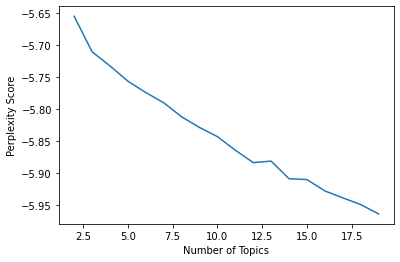

In [22]:
x = range(2,20)
plt.plot(x, perplexity_values)
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity Score")
plt.show()

# ppl 낮을수록 좋음

In [23]:
# Coherence score 구하고 그래프 작성하기
from gensim.models import CoherenceModel
coherence_values = []
for i in range(2, 20):
     ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = i, id2word = dictionary)
     coherence_model_lda = CoherenceModel(model = ldamodel,texts = processed_data ,dictionary = dictionary, topn = 10)
     coherence_lda = coherence_model_lda.get_coherence()
     coherence_values.append(coherence_lda)
     print("co:",coherence_lda)

co: 0.5793503074955035
co: 0.6114657334171426
co: 0.6009847989290139
co: 0.6109873282770323
co: 0.6152576974445565
co: 0.5718130866651993
co: 0.5942578304543349
co: 0.608074133697711
co: 0.587209311047289
co: 0.5886883467426717
co: 0.6224508061304755
co: 0.6111894359728622
co: 0.5869934821097206
co: 0.5941201594395983
co: 0.5922715045982554
co: 0.5959273369206989
co: 0.6052064045743742
co: 0.6039262238083484


In [24]:
coherence_values

[0.5793503074955035,
 0.6114657334171426,
 0.6009847989290139,
 0.6109873282770323,
 0.6152576974445565,
 0.5718130866651993,
 0.5942578304543349,
 0.608074133697711,
 0.587209311047289,
 0.5886883467426717,
 0.6224508061304755,
 0.6111894359728622,
 0.5869934821097206,
 0.5941201594395983,
 0.5922715045982554,
 0.5959273369206989,
 0.6052064045743742,
 0.6039262238083484]

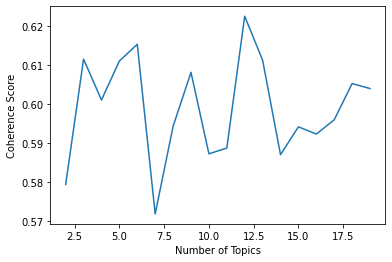

In [25]:
x = range(2,20)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.show()

# coherence 높을수록 좋음(3,6,12)

In [32]:
import gensim
NUM_TOPICS = 3 #10개의 토픽, k=10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)

(0, '0.058*"수분" + 0.056*"피부" + 0.033*"크림" + 0.033*"건조" + 0.031*"제품" + 0.025*"느낌" + 0.020*"여름" + 0.019*"지성" + 0.018*"흡수" + 0.018*"사용"')
(1, '0.100*"토너" + 0.070*"사용" + 0.046*"피부" + 0.029*"스킨" + 0.029*"제품" + 0.025*"진정" + 0.020*"효과" + 0.019*"구매" + 0.019*"화장" + 0.018*"여드름"')
(2, '0.086*"구매" + 0.079*"자극" + 0.054*"피부" + 0.052*"사용" + 0.044*"제품" + 0.024*"세일" + 0.024*"가격" + 0.023*"만족" + 0.020*"대용량" + 0.020*"용량"')


In [33]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = 3, id2word = dictionary)

# lda dataframe형태로 출력
word_dict = {};

for i in range(NUM_TOPICS):
    words = ldamodel.show_topic(i, topn = 10)
    word_dict['Topic # ' + '{:02d}'.format(i+1)] = [i[0] for i in words]

pd.DataFrame(word_dict)

,Topic # 01,Topic # 02,Topic # 03
0,토너,피부,제품
1,사용,사용,수분
2,피부,자극,구매
3,구매,토너,사용
4,스킨,구매,피부
5,제품,트리,느낌
6,제형,여드름,건조
7,진정,진정,크림
8,세일,대용량,배송
9,성분,용량,추천


In [ ]:
'''
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3): 
    """ 
    Compute c_v coherence for various number of topics 
    Parameters: 
    ---------- 
    dictionary : Gensim dictionary 
    corpus : Gensim corpus 
    texts : List of input texts 
    limit : Max num of topics 
    
    Returns: 
    ------- 
    model_list : List of LDA topic models 
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics 
    """ 
    coherence_values = [] 
    model_list = [] 
    for num_topics in range(start, limit, step): 
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics) 
        model_list.append(model) 
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v') 
        coherence_values.append(coherencemodel.get_coherence()) 
        print(coherencemodel.get_coherence())
        return model_list, coherence_values 
        
def find_optimal_number_of_topics(dictionary, corpus, processed_data): 
    limit = 40; 
    start = 2; 
    step = 6; 
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step) 
    
    x = range(start, limit, step) 
    print("x:", x)
    print("coher", coherence_values)
    plt.plot(x, coherence_values) 
    plt.xlabel("Num Topics") 
    plt.ylabel("Coherence score") 
    plt.legend(("coherence_values"), loc='best') 
    plt.show() 
'''

In [ ]:
'''
processed_data = [sent.strip().split(",") for sent in tqdm(open('/content/drive/MyDrive/데캡디/tokenized_data.csv', 'r', encoding='utf-8').readlines())] 
    
# 정수 인코딩과 빈도수 생성 
dictionary = corpora.Dictionary(processed_data) 
    
# 출현빈도가 적거나 자주 등장하는 단어는 제거 
dictionary.filter_extremes(no_below=10, no_above=0.05) 
corpus = [dictionary.doc2bow(text) for text in processed_data] 
print('Number of unique tokens: %d' % len(dictionary)) 
print('Number of documents: %d' % len(corpus)) 
    
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 
    
# 최적의 토픽 수 찾기 
find_optimal_number_of_topics(dictionary, corpus, processed_data)
'''